# Оцінка параметрів лінійної регресійної моделі

Оцінка параметрів лінійної регресійної моделі так само як і висновки щодо статистичної значущості цих параметрів, базуються на виконанні низки математичних припущень. Діагностика виконання цих припущень є складовою процесу побудови регресійної моделі і зводиться до наступних складових (Faraway 2004):
* перевірка припущень щодо залишків моделі;
* перевірка адекватності структури систематичної частини моделі;
* виявлення незвичайних спостережень.

>При діагностиці регресійних моделей для оцінки адекватності регресійної моделі виконуються такі 
перевірки кожного з цих припущень:
1. Лінійність моделі
2. Нормальний розподіл залишків
3. Однаковий розподіл залишків
4. Незалежність залишків

# Лінійність взаємозв'язку


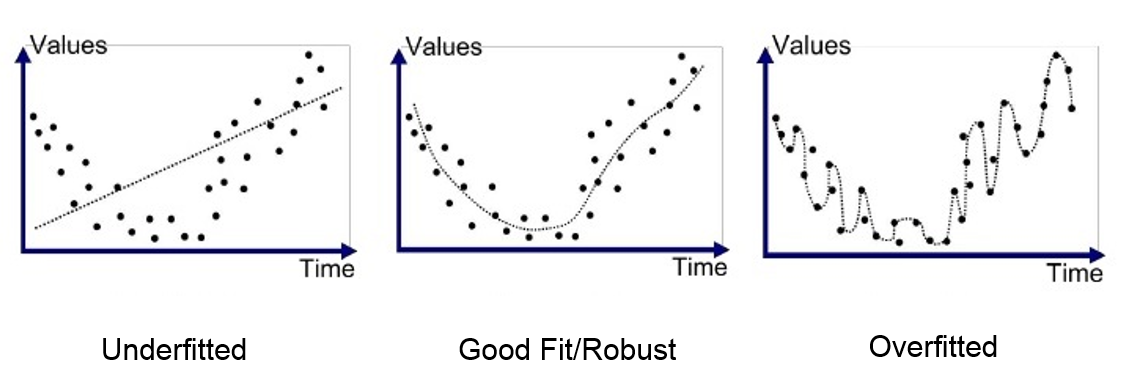

Перевірку лінійності моделі можна виконати двома способами.

1. Графік залишків за експериментальними значеннями $у$
2. Графік залишків по незалежній змінній

Зручним методом перевірки лінійності моделі служить графік залишків за експериментальними значеннями $y$. Якщо припущення про лінійність та однорідність дисперсій виконані, залежність між У та залишками повинна бути відсутня, будь-яка невипадкова тенденція в розташуванні точок на графіку свідчить про нелінійність моделі.
Якщо умова лінійності виконується, то залишки були б випадково розкидані навколо горизонтальної прямої, що проходить через 0.

Можна також дослідити графіки, по одній осі яких розташовуються окремі незалежні змінні $x$, за іншою – залишки $y$.

Обидва типи графіка дозволяють перевірити припущення про **лінійність**, **однорідність** та **незалежність** помилок і локалізувати викиди. Поява помітної закономірності у розподілі залишків є індикатором певної неадекватності моделі експериментальним даним.

# Трансформація даних (Data Transformation)

<!-- [![image.png](attachment:image.png)](https://uk.wikipedia.org/wiki/Перетворення_даних_(статистика)) -->
<a href="https://uk.wikipedia.org/wiki/Перетворення_даних_(статистика)"><img src="https://t0.gstatic.com/faviconV2?client=SOCIAL&type=FAVICON&fallback_opts=TYPE,SIZE,URL&url=http://uk.wikipedia.org&size=16" width="50" height="50" style='border: 2px solid #9c9a9a;'></a>

#### Логарифмічна трансформація змінних

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

url = 'https://gallery.shinyapps.io/066-upload-file/_w_7e163e33/mtcars.csv'
mtc = pd.read_csv(url)

(3.7, 6.2)

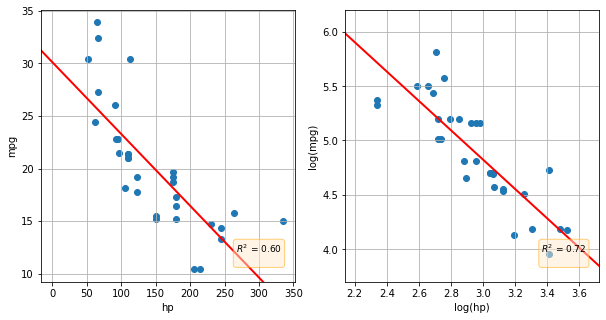

In [7]:
true_x = mtc.loc[:,'hp']
true_y = mtc.loc[:,'mpg']
y_ = np.log(true_x)  # mtc.loc[:,'mpg']
x_ = np.log(true_y)  # mtc.loc[:,'hp']

fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# ===============================axs[0]
axs[0].scatter(true_x, true_y)
axs[0].grid()
axs[0].set_xlabel('hp')
axs[0].set_ylabel('mpg')

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(true_x, true_y)
axs[0].axline(xy1=(0, intercept), slope=slope, color='r', lw=2)
R_squared = r_value**2
residuals = (intercept+true_x*slope) - true_y
stat = (f'$R^2$ = {r_value**2:.2f}\n')
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
axs[0].text(0.95, 0.07, stat, fontsize=9, bbox=bbox,
            transform=axs[0].transAxes, horizontalalignment='right')
    
#===============================axs[1]
axs[1].scatter(x=x_, y=y_)
axs[1].grid()
axs[1].set_xlabel('log(hp)')
axs[1].set_ylabel('log(mpg)')

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(x_, y_)
axs[1].axline(xy1=(0, intercept), slope=slope, color='r', lw=2)
R_squared = r_value**2
residuals_log_transform = (intercept+x_*slope) - y_
stats1 = (f'$R^2$ = {r_value**2:.2f}\n')
bbox1 = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
axs[1].text(0.95, 0.07, stats1, fontsize=9, bbox=bbox1,
            transform=axs[1].transAxes, horizontalalignment='right')

axs[1].set_xlim(min(x_)-0.2, max(x_)+0.2)
axs[1].set_ylim(3.7, 6.2)

Як видно, після трансформаціїї коефіцієнт детермінації зріс на 12%

In [32]:
# Розподіл залишків за тестом Шапіро-Уілка (p<0.05) що свідчить про ненормальність розподілу
stats.shapiro(residuals)

ShapiroResult(statistic=0.9233669638633728, pvalue=0.025681527331471443)

In [33]:
# тоді як при трансформуванні даних залишки наближаються до нормального розподілу
stats.shapiro(residuals_log_transform)

ShapiroResult(statistic=0.9781622886657715, pvalue=0.7446475625038147)

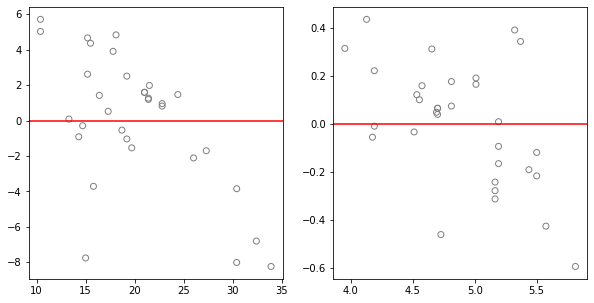

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
# plt.scatter(true_y, residuals, s=80, color='g')
axs[0].scatter(true_y, residuals, facecolor='none', edgecolor='grey')
axs[0].axhline(y=0, color='r', linestyle='-')

axs[1].scatter(y_, residuals_log_transform, facecolor='none', edgecolor='grey')
axs[1].axhline(y=0, color='r', linestyle='-')

http://www.machinelearning.ru/wiki/index.php?title=%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D1%81%D1%82%D0%B0%D1%82%D0%BA%D0%BE%D0%B2_%28%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%29

file:///C:/Users/GbreH/Dropbox/FOLDER/BOOK%20Statistical/%D0%94%D0%B8%D0%B0%D0%B3%D0%BD%D0%BE%D1%81%D1%82%D0%B8%D0%BA%D0%B0%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D1%85%20%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9%20lobanov_10_03_11.pdf

Проблема гетероскедастичності

# тест Уайта в Python
https://www.codecamp.ru/blog/white-test-in-python/

In [9]:
from sklearn. linear_model import LinearRegression
from statsmodels. stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

#define URL where dataset is located
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#read in data
data = pd.read_csv (url)

In [10]:
#define response variable
y = data['mpg']

#define predictor variables
x = data[['disp', 'hp']]

#add constant to predictor variables
x = sm.add_constant (x)

#fit regression model
model = sm. OLS (y, x). fit ()

In [11]:
#perform White's test
white_test = het_white(model. resid , model. model.exog )

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 7.0766203304166595, 'Test Statistic p-value': 0.21500404394263609, 'F-Statistic': 1.4764621093131958, 'F-Test p-value': 0.23147065943879455}


Ось як інтерпретувати висновок:

Тестова статистика $X^2$ = 7,0766.
Відповідне значення p дорівнює 0,215.
У тесті Уайта використовуються такі нульова та альтернативна гіпотези:

Null ($H_0$ ) : є **гомо**скедастичність (залишки рівномірно розкидані)
Альтернатива (HA): присутня **гетеро**скедастичність (залишки розкидані нерівномірно)
Оскільки p-значення не менше 0,05 ми не можемо відкинути нульову гіпотезу.

Це означає, що ми не маємо достатніх доказів того, що в регресійній моделі є **гетеро**скедастичність.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

y = [np.random.normal() for _ in range(30)]
x_1 = [np.random.normal() for _ in range(30)]
x_3 = [np.random.normal() for _ in range(30)]
x_2 = x_1


df = pd.DataFrame({'y':y, 'x1':x_1, 'x2':x_2, 'x3':x_3})
res = smf.ols(formula='y~x1+x2+x3', data=df).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     3.078
Date:                Fri, 26 Aug 2022   Prob (F-statistic):             0.0625
Time:                        16:54:43   Log-Likelihood:                -37.588
No. Observations:                  30   AIC:                             81.18
Df Residuals:                      27   BIC:                             85.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0651      0.165     -0.394      0.6

[2] Найменше власне значення дорівнює $2,37^{-30}$. Це може свідчити про наявність
проблеми мультиколінеарності або що матриця є сингулярною

(array([-0.12786566]), array([[ 0.00349532,  0.00349532, -0.13751346]]))

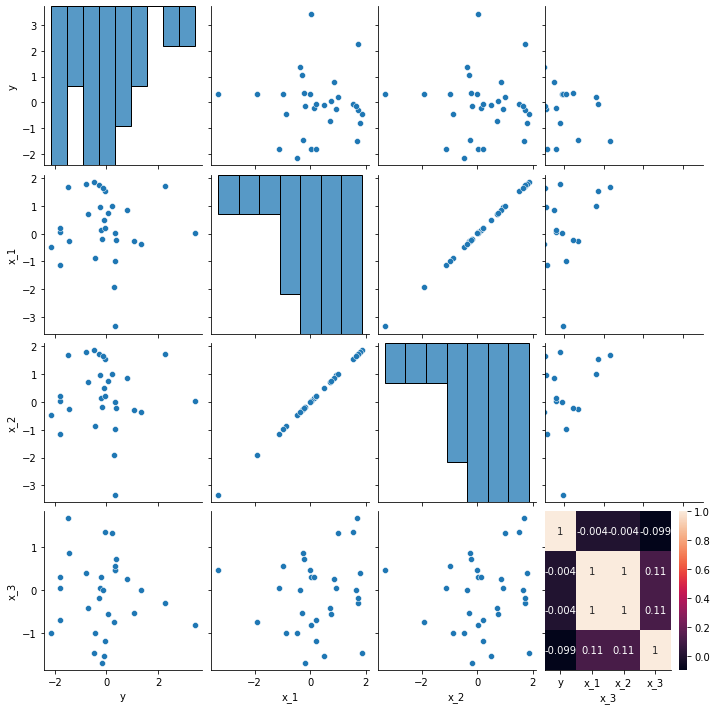

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

y = np.random.normal(0,1, 30)
x_1 = np.random.normal(0,1,30)
x_2 = x_1
x_3 = np.random.normal(0,1,30)
df = pd.DataFrame(data=[y, x_1, x_2, x_3]).T
df.columns = ['y','x_1', 'x_2', 'x_3']

sns.pairplot(df)

sns.heatmap(df.corr(), annot=True)

X, y = sm.add_constant(df.drop('y',axis=1)), df.y
sm.OLS(y,X).fit().summary()

smf.ols(formula='y ~ x_1 + x_2 + x_3', data=df).fit().summary()

X, y = df.drop('y',axis=1), df.y
y = np.array(y).reshape((-1,1))

lin_model = LinearRegression()
lin_model.fit(X,y)
lin_model.intercept_, lin_model.coef_

# Розрахуємо коефіцієнт здуття дисперсії

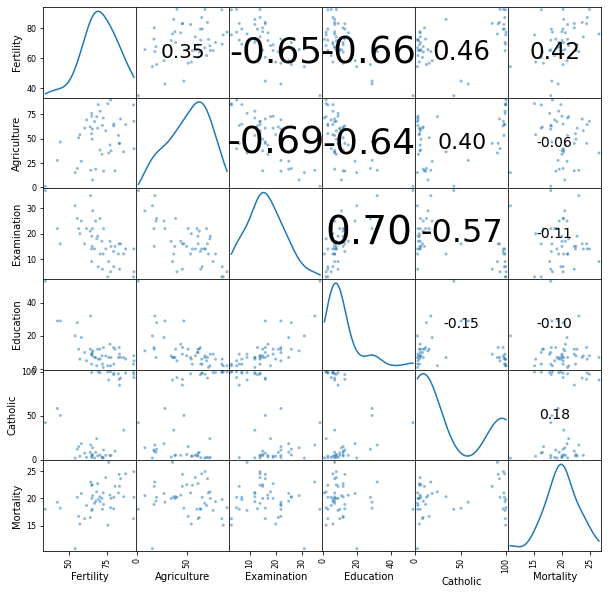

             Fertility  Agriculture  Examination  Education  Catholic  \
Fertility     1.000000     0.353079    -0.645883  -0.663789  0.463685   
Agriculture   0.353079     1.000000    -0.686542  -0.639523  0.401095   
Examination  -0.645883    -0.686542     1.000000   0.698415 -0.572742   
Education    -0.663789    -0.639523     0.698415   1.000000 -0.153859   
Catholic      0.463685     0.401095    -0.572742  -0.153859  1.000000   
Mortality     0.416556    -0.060859    -0.114022  -0.099322  0.175496   

             Mortality  
Fertility     0.416556  
Agriculture  -0.060859  
Examination  -0.114022  
Education    -0.099322  
Catholic      0.175496  
Mortality     1.000000  

VIF:
                     0            1         2            3          4  \
VIF Factor  104.924833     2.284129   1.93716      3.67542   1.107542   
features     Intercept  Agriculture  Catholic  Examination  Mortality   

                    5  
VIF Factor   2.774943  
features    Education  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

%matplotlib inline

url = 'https://gist.githubusercontent.com/christophsax/178d34245afdd6e187b1fff72dbe7448/raw/f5f4189f949f117bee4e82e4aa75c104ed20b4f4/swiss.csv'
data = pd.read_csv(url)
data.rename(columns={'Infant.Mortality': 'Mortality'}, inplace=True)


# сравнение по матрице регресии
axes = pd.plotting.scatter_matrix(data, figsize=(10,10), diagonal='kde', grid=True)
corr = data.corr()

# это для крассивой аннотации
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    value = corr.values[i,j]
    if abs(value) <= 0.25:
        fontsize = 14
    else:
        fontsize = round(56*abs(value))
    axes[i, j].annotate(
        "%.2f" %value, (0.5, 0.5), xycoords='axes fraction'
        , ha='center', va='center', fontsize=fontsize
    )
plt.show()

print(corr)


# рассчитываем VIF
predictors = " + ".join(list(
    set(data.columns) - set(['Fertility', 'Location'])
    ))
y, X = dmatrices('Fertility ~' + predictors, data, return_type='dataframe')


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(f'\nVIF:\n{vif.T}')

Якщо VIF > 10 краще предиктор виключити з моделі

[link](https://stepik.org/lesson/42714/step/6?unit=20870)

# У випадку досить сильної мультиколінеарності предикторів можна застосувати метод головної компоненти та знову провести регресійний аналіз вже з головними компонентами

[link](https://stepik.org/lesson/42714/step/13?unit=20870)

# Порушення припущення про незалежність спостережень